In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
stata_file_path = '/content/gdrive/My Drive/ZAKR71FL.DTA'
df = pd.read_stata(stata_file_path)
print(df.head())

            caseid  midx v000  v001  v002  v003  v004     v005  v006  v007  \
0         1  28  2     1  ZA7     1    28     2     1  1396726     8  2016   
1         1  28  2     2  ZA7     1    28     2     1  1396726     8  2016   
2         1  36  2     1  ZA7     1    36     2     1  1396726    10  2016   
3         1  93  2     1  ZA7     1    93     2     1  1396726     8  2016   
4         2  34  4     1  ZA7     2    34     4     2  1206331     9  2016   

   ...  s526a  s526b  s526c  s526d  s526e  s526f s526g s526h s526x  s526z  
0  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN  
1  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN  
2  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN  
3  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN  
4  ...     no     no     no     no     no     no    no    no    no     no  

[5 rows x 1040 columns]


In [ ]:
df.shape

(3548, 1040)

In [ ]:
# looking at data types for the variables
df.dtypes

,0
caseid,object
midx,int8
v000,object
v001,int16
v002,int8
...,...
s526f,category
s526g,category
s526h,category
s526x,category


In [ ]:
# Looking for duplicate values and dropping them from dataset
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
# Checking the missing values in the columns
df.isnull().sum()

,0
caseid,0
midx,0
v000,0
v001,0
v002,0
...,...
s526f,1577
s526g,1577
s526h,1577
s526x,1577


In [ ]:
# dropping columns that have more than 50% missing values

# Calculating the threshold of non-missing values
threshold = len(df) * 0.5

# Dropping columns with more than 50% missing values
df_cleaned = df.dropna(axis=1, thresh=threshold)

print(f"Columns before dropping: {df.columns.tolist()}")
print(f"Columns after dropping: {df_cleaned.columns.tolist()}")

Columns before dropping: ['caseid', 'midx', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102', 'v103', 'v104', 'v105', 'v105a', 'v106', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151', 'v152', 'v153', 'awfactt', 'awfactu', 'awfactr', 'awfacte', 'awfactw', 'v155', 'v156', 'v157', 'v158', 'v159', 'v160', 'v161', 'v166', 'v167', 'v168', 'v169a', 'v169b', 'v170', 'v171a', 'v171b', 'v190', 'v191', 'v190a', 'v191a', 'ml101', 'v201', 'v202', 'v203', 'v204', 'v205', 'v206', 'v207', 'v208', 'v209', 'v210', 'v211', 

In [ ]:
# Identifying dropped columns
dropped_columns = set(df.columns.tolist()) - set(df_cleaned.columns.tolist()) # Convert lists to sets to perform set difference
print(f"Dropped columns: {dropped_columns}")

Dropped columns: {'s431b', 'v604', 'h37c', 'h52d', 'm55b', 'm57r', 'h54y', 'v3a00n', 'v476', 'h12e', 'ml101', 'v477', 'v414v', 'v704', 'v445', 'v3a08z', 'v475', 'hw12', 'h39', 'h37p', 'h32k', 'h12p', 'v704a', 'v3a03', 'v3a00g', 'v413c', 'h32v', 'v472n', 'm55g', 'v467j', 'hw16', 'h62m', 'v474h', 'h21a', 'h32b', 'v463e', 'm57u', 'm65j', 'h12i', 'm55d', 's653c', 'hw18', 'v230', 'h12q', 'h12m', 'v3a00v', 'h12w', 'v504', 'v469e', 'hw56', 'v603', 'v463j', 'v481d', 'v631', 'h37l', 'h15d', 'v414u', 'm36', 'v541', 's236c', 'h32y', 'v472m', 'h64d', 'v474d', 'h5m', 'v372a', 'h32h', 'm55i', 'h66y', 'v026', 'h51d', 'h32t', 'v465', 's505b', 'v481f', 'v393a', 'v3a08x', 'v034', 'v474j', 'm49f', 'm65h', 'v719', 'v508', 'v3a08r', 'v3a08o', 'h11b', 'm55o', 'm2e', 'v730', 'm47', 'h37da', 'v3a06', 'v743c', 'v408', 's1515c', 'h45', 'h37aa', 'h65y', 'v474', 'v3a08g', 'h3y', 'v472d', 'h33d', 'h50d', 'v458', 'v3a08k', 'v746', 'h32c', 'h60', 'h7m', 'm57o', 'm42a', 'v243', 'h37h', 'm3m', 'm1c', 'v456', 'h15l', '

In [ ]:
df_cleaned.shape

(3548, 372)

In [ ]:
# List of variables of interest
columns_of_interest = ['caseid', 'v010', 'v012', 'v013' , 'v024', 'v025', 'v103','v106','v113', 'v116', 'v119', 'v012','v121', 'v131', 'v136', 'v137','v150', 'v151', 'v152', 'v171a', 'v190', 'v201', 'v208','v212', 'v501','bord','b0', 'v714', 'b2','b4','b5', 'b19', 'b11','b12','m4', 'm14', 'm15', 'm17']

In [ ]:
# Create a new DataFrame with only the selected columns. The selected columns are based on the Chen and Mo framework
df_selected = df[columns_of_interest]

# Display the first few rows of the new DataFrame
print(df_selected.head())

            caseid  v010  v012   v013           v024   v025         v103  \
0         1  28  2  1975    41  40-44        gauteng  urban          NaN   
1         1  28  2  1975    41  40-44        gauteng  urban          NaN   
2         1  36  2  1989    27  25-29        gauteng  urban         town   
3         1  93  2  1994    22  20-24        gauteng  urban  countryside   
4         2  34  4  1990    26  25-29  kwazulu-natal  rural  countryside   

        v106                 v113                               v116  ...  \
0  secondary  piped into dwelling        flush to piped sewer system  ...   
1  secondary  piped into dwelling        flush to piped sewer system  ...   
2  secondary  piped into dwelling        flush to piped sewer system  ...   
3  secondary  piped into dwelling        flush to piped sewer system  ...   
4  secondary   piped to yard/plot  pit latrine without slab/open pit  ...   

     b2      b4   b5 b19    b11  b12   m4                  m14  \
0  2012  femal

In [ ]:
# Renaming of the variables from old to new names so that they are identifieable
new_column_names = {
    'caseid':'Case_ID',
    'v010':'Respondent_birth_year',
    'v012':'Respondent_birth_month',
    'v013': 'Age of mother in 5-year groups',
    'v024':'Province',
    'v025':'Type of residence',
    'v103':'Childhood_place_of_residence',
    'v106':'Highest_education_level',
    'v113':'Source_of_drinking_water',
    'v116':'Type_of_toilet_facility',
    'v119':'Household_has_electricity',
    'v120':'Household_has_radio',
    'v121':'Household_has_television',
    'v131':'Ethnicity',
    'v136':'Number_of_household_members',
    'v137':'Children_5_and_under_in_household',
    'v150':'Relationship_to_household_head',
    'v151':'Sex_of_household_head',
    'v152':'Age_of_household_head',
    'v171a':'Use_of_internet',
    'v190':'Wealth_index_combined',
    'v201':'Total_childreb_ever_born',
    'v208':'Births_in_last_five_years',
    'v212':'Age_of_respondents_at_1st_birth',
    'v501':'Current_marital_status',
    'v714':'Respondent_occtpation',
    'bord':'birth_order',
    'b0':'Child_is_twin',
    'b2': 'year_of_birth',
    'b4': 'gender_of_child',
    'b5':'child_is_alive',
    'b19':'age_of_child_in_months',
    'b11':'preceding_birth_interval',
    'b12':'succeeding_birth_interval',
    'm4': 'duration_of_breastfeeding',
    'm14':'Number_of_ANC_visits_during_pregnancy',
    'm15':'place_of_delivery',
    'm17': 'delivery_by_CS'
}
# The columns in the dataframe to be renamed
df_selected.rename(columns=new_column_names, inplace=True)

In [ ]:
# Verify columns of interest
df_selected.head()

,Case_ID,Respondent_birth_year,Respondent_birth_month,Age of mother in 5-year groups,Province,Type of residence,Childhood_place_of_residence,Highest_education_level,Source_of_drinking_water,Type_of_toilet_facility,...,year_of_birth,gender_of_child,child_is_alive,age_of_child_in_months,preceding_birth_interval,succeeding_birth_interval,duration_of_breastfeeding,Number_of_ANC_visits_during_pregnancy,place_of_delivery,delivery_by_CS
0,1 28 2,1975,41,40-44,gauteng,urban,NaN,secondary,piped into dwelling,flush to piped sewer system,...,2012,female,yes,53,133.0,NaN,1.0,4.0,government hospital,no
1,1 28 2,1975,41,40-44,gauteng,urban,NaN,secondary,piped into dwelling,flush to piped sewer system,...,2012,female,yes,53,133.0,NaN,NaN,NaN,government clinic/community health centre,no
2,1 36 2,1989,27,25-29,gauteng,urban,town,secondary,piped into dwelling,flush to piped sewer system,...,2012,male,yes,51,NaN,NaN,1.0,don't know,government hospital,no
3,1 93 2,1994,22,20-24,gauteng,urban,countryside,secondary,piped into dwelling,flush to piped sewer system,...,2012,male,yes,44,NaN,NaN,2.0,no antenatal visits,government hospital,no
4,2 34 4,1990,26,25-29,kwazulu-natal,rural,countryside,secondary,piped to yard/plot,pit latrine without slab/open pit,...,2014,female,yes,29,32.0,NaN,2.0,4.0,government hospital,no


In [ ]:
# Verify columns of interest
df_selected.tail()

,Case_ID,Respondent_birth_year,Respondent_birth_month,Age of mother in 5-year groups,Province,Type of residence,Childhood_place_of_residence,Highest_education_level,Source_of_drinking_water,Type_of_toilet_facility,...,year_of_birth,gender_of_child,child_is_alive,age_of_child_in_months,preceding_birth_interval,succeeding_birth_interval,duration_of_breastfeeding,Number_of_ANC_visits_during_pregnancy,place_of_delivery,delivery_by_CS
3543,750 32 2,1994,22,20-24,mpumalanga,rural,NaN,secondary,piped to yard/plot,ventilated improved pit latrine (vip),...,2012,female,yes,52,NaN,14.0,NaN,NaN,government hospital,no
3544,750 48 2,1976,40,40-44,mpumalanga,rural,tribal area,no education,piped to neighbor,pit latrine without slab/open pit,...,2015,female,no,14,37.0,NaN,NaN,4.0,government hospital,no
3545,750 48 2,1976,40,40-44,mpumalanga,rural,tribal area,no education,piped to neighbor,pit latrine without slab/open pit,...,2012,male,yes,52,46.0,37.0,NaN,NaN,government hospital,no
3546,750 67 2,1984,31,30-34,mpumalanga,rural,tribal area,no education,piped to yard/plot,no facility/bush/field,...,2013,male,yes,32,37.0,NaN,6.0,7.0,government hospital,no
3547,750 80 3,1996,20,20-24,mpumalanga,rural,NaN,secondary,piped to yard/plot,pit latrine with slab,...,2016,male,yes,5,NaN,NaN,never breastfed,8.0,government hospital,no


In [ ]:
df_selected.isna().sum()

,0
Case_ID,0
Respondent_birth_year,0
Respondent_birth_month,0
Age of mother in 5-year groups,0
Province,0
Type of residence,0
Childhood_place_of_residence,1742
Highest_education_level,0
Source_of_drinking_water,0
Type_of_toilet_facility,0


In [ ]:
# Dropping unnecessary variables
df_selected = df_selected.drop('Case_ID', axis=1)

In [ ]:
df_selected.shape

(3548, 37)

In [ ]:
df_selected = df_selected.drop('Childhood_place_of_residence', axis=1)

In [ ]:
df_selected = df_selected.drop('year_of_birth', axis=1)

In [ ]:
# Checking if the 'b18' column is present and getting summary statistics
summary_stats = df_selected['age_of_child_in_months'].describe()
# Displaying the summary statistics
print(summary_stats)

count    3548.000000
mean       29.644025
std        17.422133
min         0.000000
25%        15.000000
50%        30.000000
75%        45.000000
max        59.000000
Name: age_of_child_in_months, dtype: float64


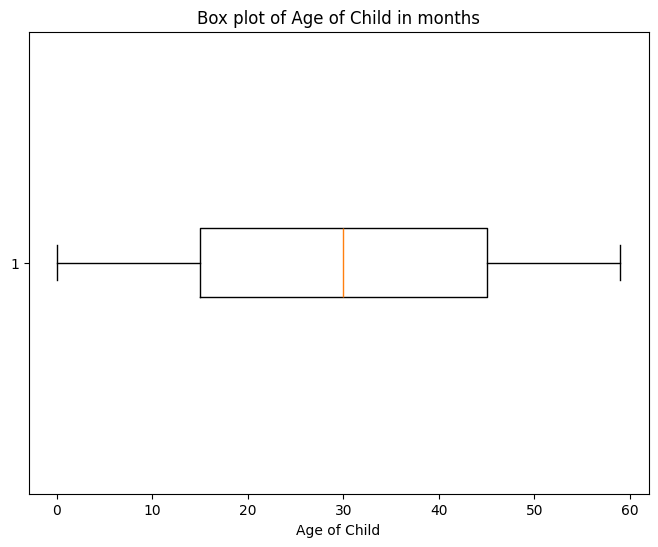

In [ ]:
# Creating a box plot for 'b18' (age of child)
plt.figure(figsize=(8, 6))
plt.boxplot(df_selected['age_of_child_in_months'].dropna(), vert=False)
plt.title('Box plot of Age of Child in months')
plt.xlabel('Age of Child')
plt.show()

In [ ]:
df_selected.shape

(3548, 35)

In [ ]:
print (df_selected['preceding_birth_interval'])

0       133.0
1       133.0
2         NaN
3         NaN
4        32.0
        ...  
3543      NaN
3544     37.0
3545     46.0
3546     37.0
3547      NaN
Name: preceding_birth_interval, Length: 3548, dtype: float64


In [ ]:
# Impute missing values in 'preceding_birth_interval' by filling with the previous value
df_selected['preceding_birth_interval'] = df_selected['preceding_birth_interval'].fillna(method='ffill')

# Display the result to verify
print(df_selected[['preceding_birth_interval']].head())


   preceding_birth_interval
0                     133.0
1                     133.0
2                     133.0
3                     133.0
4                      32.0


In [ ]:
df_selected.isna().sum()

,0
Respondent_birth_year,0
Respondent_birth_month,0
Age of mother in 5-year groups,0
Province,0
Type of residence,0
Highest_education_level,0
Source_of_drinking_water,0
Type_of_toilet_facility,0
Household_has_electricity,0
Respondent_birth_month,0


In [ ]:
print (df_selected['succeeding_birth_interval'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
3543    14.0
3544     NaN
3545    37.0
3546     NaN
3547     NaN
Name: succeeding_birth_interval, Length: 3548, dtype: float64


In [ ]:
# Succeding birth interval will be droppped because it had more than 50% of missing values
summary_stats = df_selected['succeeding_birth_interval'].count()
# Displaying the summary statistics
print(summary_stats)

468


In [ ]:
# Count the number of NaN values in the 'succeeding_birth_interval' column
nan_count = df_selected['succeeding_birth_interval'].isna().sum()

# Print the result
print(f"Number of NaN values in 'succeeding_birth_interval': {nan_count}")

Number of NaN values in 'succeeding_birth_interval': 3080


In [ ]:
df_selected.shape

(3548, 35)

In [ ]:
df_selected.isna().sum()

,0
Respondent_birth_year,0
Respondent_birth_month,0
Age of mother in 5-year groups,0
Province,0
Type of residence,0
Highest_education_level,0
Source_of_drinking_water,0
Type_of_toilet_facility,0
Household_has_electricity,0
Respondent_birth_month,0


In [ ]:
df_selected = df_selected.drop('succeeding_birth_interval', axis=1)

In [ ]:
df_selected.shape

(3548, 34)

Feature Engineering

In [ ]:
# Update 'child_breastfed' variable
# Assign 0 for 'never breastfed', 1 for 'NaN' values and any other responses
df_selected['child_breastfed'] = df_selected['duration_of_breastfeeding'].apply(
    lambda x: 0 if x == 'never breastfed' else 1
)

In [ ]:
count = df_selected['child_breastfed'].value_counts()
count

,count
child_breastfed,
1.0,2539
0.0,577


In [ ]:
# Replace NaN values in 'child_breastfed' with 1
df_selected['child_breastfed'] = df_selected['child_breastfed'].fillna(1)

In [ ]:
count = df_selected['child_breastfed'].value_counts()
count

,count
child_breastfed,
1.0,2971
0.0,577


In [ ]:
df_selected = df_selected.drop('duration_of_breastfeeding', axis=1)

In [ ]:
# Feature engineering of 2 variables i.e. ANC visit by the mother during Pregrancy, which takes a value of 1 if there was any visit and 0 if there was no visit

count = df_selected['Number_of_ANC_visits_during_pregnancy'].value_counts()
count



,count
Number_of_ANC_visits_during_pregnancy,
6.0,579
5.0,472
7.0,395
4.0,380
8.0,264
3.0,252
9.0,155
no antenatal visits,152
2.0,104


In [ ]:
# Count the number of NaN values in the 'succeeding_birth_interval' column
nan_count = df_selected['Number_of_ANC_visits_during_pregnancy'].isna().sum()

# Print the result
print(f"Number of NaN values in 'succeeding_birth_interval': {nan_count}")

Number of NaN values in 'succeeding_birth_interval': 512


In [ ]:
print (df_selected['Number_of_ANC_visits_during_pregnancy'])

0                       4.0
1                       NaN
2                don't know
3       no antenatal visits
4                       4.0
               ...         
3543                    NaN
3544                    4.0
3545                    NaN
3546                    7.0
3547                    8.0
Name: Number_of_ANC_visits_during_pregnancy, Length: 3548, dtype: category
Categories (22, object): ['no antenatal visits' < 1.0 < 2.0 < 3.0 ... 18.0 < 19.0 < 20.0 < 'don't know']


In [ ]:
df_selected['Number_of_ANC_visits_during_pregnancy'].head()

,Number_of_ANC_visits_during_pregnancy
0,4.0
1,NaN
2,don't know
3,no antenatal visits
4,4.0


In [ ]:
# Create a new column 'ANC_visit_binary' with the required logic
df_selected['ANC_visit_binary'] = df_selected['Number_of_ANC_visits_during_pregnancy'].apply(
    lambda x: 0 if x == 'no antenatal visits' else 1 if pd.notna(x) else 1
)

# Replace NaN values in 'ANC_visit_binary' with 1
df_selected['ANC_visit_binary'] = df_selected['ANC_visit_binary'].fillna(1)

# Check the result
print(df_selected[['Number_of_ANC_visits_during_pregnancy', 'ANC_visit_binary']].head())


  Number_of_ANC_visits_during_pregnancy  ANC_visit_binary
0                                   4.0               1.0
1                                   NaN               1.0
2                            don't know               1.0
3                   no antenatal visits               0.0
4                                   4.0               1.0


In [ ]:
count = df_selected['ANC_visit_binary'].value_counts()
count

,count
ANC_visit_binary,
1.0,3396
0.0,152


In [ ]:
df_selected['Type_of_toilet_facility'].head()

,Type_of_toilet_facility
0,flush to piped sewer system
1,flush to piped sewer system
2,flush to piped sewer system
3,flush to piped sewer system
4,pit latrine without slab/open pit


In [ ]:
count1 = df_selected['Type_of_toilet_facility'].value_counts()
count1

,count
Type_of_toilet_facility,
flush to piped sewer system,1544
pit latrine without slab/open pit,869
pit latrine with slab,392
ventilated improved pit latrine (vip),253
not a dejure resident,151
no facility/bush/field,137
bucket toilet,69
flush to septic tank,56
flush to pit latrine,30


In [ ]:
# Assuming the dataset is in a DataFrame named df and the column is named 'Type_of_toilet_facility'

# Define improved and unimproved types
improved_types = [
    "flush to piped sewer system", "flush to septic tank", "flush to pit latrine",
    "ventilated improved pit latrine (vip)", "pit latrine with slab", "flush, don't know where",
    "composting toilet"
]

# Create a new column for the dichotomous variable
df_selected['Toilet_facility_dichotomous'] = df_selected['Type_of_toilet_facility'].apply(lambda x: 1 if x in improved_types else 0)

In [ ]:
count = df_selected['Toilet_facility_dichotomous'].value_counts()
count

,count
Toilet_facility_dichotomous,
1,2296
0,1252


In [ ]:
df_selected = df_selected.drop('Type_of_toilet_facility', axis=1)

In [ ]:
count = df_selected['Toilet_facility_dichotomous'].value_counts()
count

,count
Toilet_facility_dichotomous,
1,2296
0,1252


In [ ]:
count2 = df_selected['Source_of_drinking_water'].value_counts()
count2

,count
Source_of_drinking_water,
piped into dwelling,1193
piped to yard/plot,927
public tap/standpipe,557
not a dejure resident,151
river/dam/lake/ponds/stream/canal/irrigation channel,136
piped to neighbor,126
tube well or borehole,117
unprotected well,91
tanker truck,78


In [ ]:
# Assuming your dataframe is called df and the column name is 'Source_of_drinking_water'
improved_sources = [
    'piped into dwelling',
    'piped to yard/plot',
    'public tap/standpipe',
    'piped to neighbor'
    'tube well or borehole',
    'protected well',
    'rainwater',
    'protected spring',
    'bottled water',
    'tanker truck',
    'cart with small tank'
]

# Create a new column for the dichotomous variable
df_selected['drinking_water_improved'] = df_selected['Source_of_drinking_water'].apply(lambda x: 1 if x in improved_sources else 0)


In [ ]:
count = df_selected['drinking_water_improved'].value_counts()
count

,count
drinking_water_improved,
1,2861
0,687


In [ ]:
df_selected = df_selected.drop('Source_of_drinking_water', axis=1)

In [ ]:
count = df_selected['Household_has_electricity'].value_counts()
count

,count
Household_has_electricity,
yes,2992
no,405
not a dejure resident,151


In [ ]:
# Define the mapping for the dichotomous variable
electricity_mapping = {
    'yes': 1,
    'no': 0,
    'not a dejure resident': 0
}

# Apply the mapping to create a new dichotomous variable
df_selected['Household_has_electricity'] = df_selected['Household_has_electricity'].map(electricity_mapping)
count = df_selected['Household_has_electricity'].value_counts()
count

,count
Household_has_electricity,
1,2992
0,556


In [ ]:
df_selected.isna().sum()

,0
Respondent_birth_year,0
Respondent_birth_month,0
Age of mother in 5-year groups,0
Province,0
Type of residence,0
Highest_education_level,0
Household_has_electricity,0
Respondent_birth_month,0
Household_has_television,0
Ethnicity,0


In [ ]:
# Dropping of variables used to engineer certain variables
df_selected = df_selected.drop('Number_of_ANC_visits_during_pregnancy', axis=1)

In [ ]:
df_selected.columns

Index(['Respondent_birth_year', 'Respondent_birth_month',
       'Age of mother in 5-year groups', 'Province', 'Type of residence',
       'Highest_education_level', 'Household_has_electricity',
       'Respondent_birth_month', 'Household_has_television', 'Ethnicity',
       'Number_of_household_members', 'Children_5_and_under_in_household',
       'Relationship_to_household_head', 'Sex_of_household_head',
       'Age_of_household_head', 'Use_of_internet', 'Wealth_index_combined',
       'Total_childreb_ever_born', 'Births_in_last_five_years',
       'Age_of_respondents_at_1st_birth', 'Current_marital_status',
       'birth_order', 'Child_is_twin', 'Respondent_occtpation',
       'gender_of_child', 'child_is_alive', 'age_of_child_in_months',
       'preceding_birth_interval', 'place_of_delivery', 'delivery_by_CS',
       'child_breastfed', 'ANC_visit_binary', 'Toilet_facility_dichotomous',
       'drinking_water_improved'],
      dtype='object')

In [ ]:
# Dropping of variables used to engineer certain variables
df_selected = df_selected.drop('Respondent_birth_year', axis=1)
df_selected = df_selected.drop('Respondent_birth_month', axis=1)

In [ ]:
df_selected.shape

(3548, 31)

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age of mother in 5-year groups     3548 non-null   category
 1   Province                           3548 non-null   category
 2   Type of residence                  3548 non-null   category
 3   Highest_education_level            3548 non-null   category
 4   Household_has_electricity          3548 non-null   int64   
 5   Household_has_television           3548 non-null   category
 6   Ethnicity                          3548 non-null   category
 7   Number_of_household_members        3548 non-null   int8    
 8   Children_5_and_under_in_household  3548 non-null   int8    
 9   Relationship_to_household_head     3548 non-null   category
 10  Sex_of_household_head              3548 non-null   category
 11  Age_of_household_head              3548 non

In [ ]:
# Map the categories to new categories
df_selected['Child_is_twin'] = df_selected['Child_is_twin'].replace({'2nd of multiple': 'multiple birth',
                                                   '3rd of multiple': 'multiple birth',
                                                   '1st of multiple': 'multiple birth'})

# Group by the new category and count the occurrences
df_selected_counts = df_selected.groupby('Child_is_twin').size().reset_index(name='count')

# Print the result
print(df_selected_counts)

    Child_is_twin  count
0    single birth   3451
1  multiple birth     97


In [ ]:
# Convert the 'ANC_visit_category' and 'child_breastfed' variables to categorical
df_selected['ANC_visit_binary'] = df_selected['ANC_visit_binary'].astype('category')
df_selected['child_breastfed'] = df_selected['child_breastfed'].astype('category')
df_selected['Household_has_electricity']= df_selected['Household_has_electricity'].astype('category')
# Verify the changes
print(df_selected[['ANC_visit_binary', 'child_breastfed', 'Household_has_electricity']].dtypes)

ANC_visit_binary             category
child_breastfed              category
Household_has_electricity    category
dtype: object


In [ ]:
df_selected.shape

(3548, 31)

In [ ]:
df_selected.columns

Index(['Age of mother in 5-year groups', 'Province', 'Type of residence',
       'Highest_education_level', 'Household_has_electricity',
       'Household_has_television', 'Ethnicity', 'Number_of_household_members',
       'Children_5_and_under_in_household', 'Relationship_to_household_head',
       'Sex_of_household_head', 'Age_of_household_head', 'Use_of_internet',
       'Wealth_index_combined', 'Total_childreb_ever_born',
       'Births_in_last_five_years', 'Age_of_respondents_at_1st_birth',
       'Current_marital_status', 'birth_order', 'Child_is_twin',
       'Respondent_occtpation', 'gender_of_child', 'child_is_alive',
       'age_of_child_in_months', 'preceding_birth_interval',
       'place_of_delivery', 'delivery_by_CS', 'child_breastfed',
       'ANC_visit_binary', 'Toilet_facility_dichotomous',
       'drinking_water_improved'],
      dtype='object')

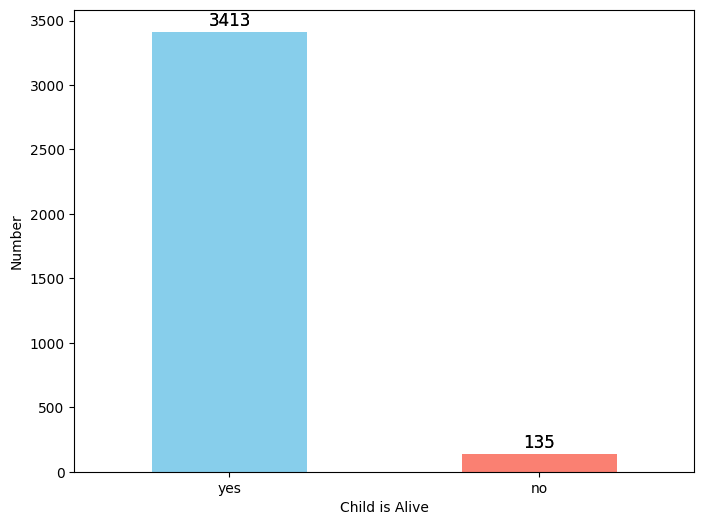

In [ ]:
# Creating a bar chart for child is alive variable
import matplotlib.pyplot as plt

alive_counts = df_selected['child_is_alive'].value_counts()
plt.figure(figsize=(8, 6))
bars = alive_counts.plot(kind='bar', color=['skyblue', 'salmon'])
alive_counts.plot(kind='bar', color=['skyblue', 'salmon'])


# Annotate the bars with their values
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), 'd'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')

#plt.title('Distribution of Child is Alive')
plt.xlabel('Child is Alive')
plt.ylabel('Number')
plt.xticks(rotation=0)
plt.show()


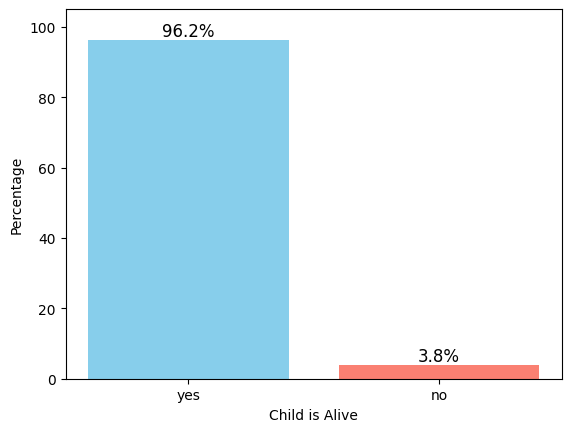

In [ ]:
# Calculate the percentage
percentages = df_selected['child_is_alive'].value_counts(normalize=True) * 100

# Plotting the percentage
fig, ax = plt.subplots()
bars = ax.bar(percentages.index, percentages, color=['skyblue', 'salmon'])

# Annotating the bars with percentage values
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)

# Labeling the graph
#plt.title('Distribution of whether the Child is Alive (in %)')
plt.ylabel('Percentage')
plt.xlabel('Child is Alive')
plt.ylim(0, 105)

# Show the plot
plt.show()

In [ ]:
# Convert the 'Age_of_household_head' column to numeric, setting errors='coerce' to replace non-numeric values with NaN
df_selected['Age_of_household_head'] = pd.to_numeric(df_selected['Age_of_household_head'], errors='coerce')

# Calculate the mean of the column, ignoring NaN values
mean_value = df_selected['Age_of_household_head'].mean()

# Replace NaN values (which correspond to 'don't know') with the mean
df_selected['Age_of_household_head'].fillna(mean_value, inplace=True)

# Verify the result
print(df_selected['Age_of_household_head'])


0       43.0
1       43.0
2       31.0
3       36.0
4       60.0
        ... 
3543    42.0
3544    77.0
3545    77.0
3546    31.0
3547    45.0
Name: Age_of_household_head, Length: 3548, dtype: float64


In [ ]:
# Convert 'Age_of_household_head' to integer
df_selected['Age_of_household_head'] = df_selected['Age_of_household_head'].astype(int)

# Verify the change
print(df_selected['Age_of_household_head'].dtypes)


int64


In [ ]:
# Convert 'drinking_water_improved' to a categorical variable
df_selected['drinking_water_improved'] = df_selected['drinking_water_improved'].astype('category')

# Convert 'Toilet_facility_dichotomous' to a categorical variable
df_selected['Toilet_facility_dichotomous'] = df_selected['Toilet_facility_dichotomous'].astype('category')


In [ ]:
# Convert 'Births_in_last_five_years' to an integer type
df_selected['Births_in_last_five_years'] = df_selected['Births_in_last_five_years'].astype(int)

In [ ]:
# Get all categorical variables
categorical_vars = df_selected.select_dtypes(include=['category']).columns.tolist()

# Get all numerical variables (integers and floats)
numerical_vars = df_selected.select_dtypes(include=['int8', 'float64']).columns.tolist()

# Output the lists of variables
print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['Age of mother in 5-year groups', 'Province', 'Type of residence', 'Highest_education_level', 'Household_has_electricity', 'Household_has_television', 'Ethnicity', 'Relationship_to_household_head', 'Sex_of_household_head', 'Use_of_internet', 'Wealth_index_combined', 'Current_marital_status', 'Child_is_twin', 'Respondent_occtpation', 'gender_of_child', 'child_is_alive', 'place_of_delivery', 'delivery_by_CS', 'child_breastfed', 'ANC_visit_binary', 'Toilet_facility_dichotomous', 'drinking_water_improved']
Numerical Variables: ['Number_of_household_members', 'Children_5_and_under_in_household', 'Total_childreb_ever_born', 'Age_of_respondents_at_1st_birth', 'birth_order', 'age_of_child_in_months', 'preceding_birth_interval']


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age of mother in 5-year groups     3548 non-null   category
 1   Province                           3548 non-null   category
 2   Type of residence                  3548 non-null   category
 3   Highest_education_level            3548 non-null   category
 4   Household_has_electricity          3548 non-null   category
 5   Household_has_television           3548 non-null   category
 6   Ethnicity                          3548 non-null   category
 7   Number_of_household_members        3548 non-null   int8    
 8   Children_5_and_under_in_household  3548 non-null   int8    
 9   Relationship_to_household_head     3548 non-null   category
 10  Sex_of_household_head              3548 non-null   category
 11  Age_of_household_head              3548 non

In [ ]:
# Define the mapping for the dichotomous variable
television_mapping = {
    'yes': 1,
    'no': 0,
    'not a dejure resident': 0
}

# Apply the mapping to create a new dichotomous variable
df_selected['Household_has_television'] = df_selected['Household_has_television'].map(television_mapping)
count = df_selected['Household_has_television'].value_counts()

In [ ]:
count = df_selected['Household_has_television'].value_counts()
count

,count
Household_has_television,
1,2619
0,929


In [ ]:
df_selected.shape

(3548, 31)

In [ ]:
from scipy.stats import chi2_contingency
# Define a function to generate contingency table, calculate percentages, and perform chi-square test
def contingency_table_with_pval(df_selected, var, outcome):
    # Generate contingency table
    contingency_table = pd.crosstab(df_selected[var], df_selected[outcome])

    # Calculate row percentages
    row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Combine counts and row percentages
    combined_table = pd.concat([contingency_table, row_percentages], axis=1, keys=["Count", "Col N %"])

    # Format the output to include p-value
    print(f"\nContingency Table for {var}:")
    print(combined_table)
    print(f"P-value: {p_val:.4f}\n")

# Example usage: Use this function for each variable
variables = ['gender_of_child','Age of mother in 5-year groups', 'Province', 'Type of residence', 'Highest_education_level', 'drinking_water_improved', 'Toilet_facility_dichotomous', # Added a space to 'Source_of_drinking_water '
             'Household_has_electricity', 'Household_has_television', 'Ethnicity', 'Relationship_to_household_head', 'Sex_of_household_head',
             'Use_of_internet', 'Wealth_index_combined', 'Current_marital_status', 'Child_is_twin', 'Respondent_occtpation',
             'place_of_delivery', 'delivery_by_CS', 'child_breastfed', 'ANC_visit_binary'] #'Births_in_last_five_years'

# Apply the function for each variable
for var in variables:
    contingency_table_with_pval(df_selected, var, 'child_is_alive')


Contingency Table for gender_of_child:
                Count         Col N %           
child_is_alive     no   yes        no        yes
gender_of_child                                 
male               79  1753  4.312227  95.687773
female             56  1660  3.263403  96.736597
P-value: 0.1226


Contingency Table for Age of mother in 5-year groups:
                               Count        Col N %           
child_is_alive                    no  yes        no        yes
Age of mother in 5-year groups                                
15-19                              8  211  3.652968  96.347032
20-24                             30  803  3.601441  96.398559
25-29                             39  960  3.903904  96.096096
30-34                             23  722  3.087248  96.912752
35-39                             23  448  4.883227  95.116773
40-44                             10  227  4.219409  95.780591
45-49                              2   42  4.545455  95.454545
P-value: 0.82

In [ ]:
num_vars = df_selected[['Number_of_household_members', 'Children_5_and_under_in_household', 'Total_childreb_ever_born', 'Age_of_respondents_at_1st_birth', 'birth_order', 'age_of_child_in_months', 'preceding_birth_interval', 'Births_in_last_five_years']]

In [ ]:
# Getting summary statistics
summary_stats = num_vars.describe()

# Getting data types
data_types = num_vars.dtypes

# Adding the data type information to the summary statistics
summary_stats.loc['Data Type'] = data_types
print(summary_stats)


          Number_of_household_members Children_5_and_under_in_household  \
count                          3548.0                            3548.0   
mean                         5.751691                          1.423337   
std                           3.00616                          1.005503   
min                               1.0                               0.0   
25%                               4.0                               1.0   
50%                               5.0                               1.0   
75%                               7.0                               2.0   
max                              24.0                               7.0   
Data Type                        int8                              int8   

          Total_childreb_ever_born Age_of_respondents_at_1st_birth  \
count                       3548.0                          3548.0   
mean                       2.38867                       20.584837   
std                       1.412121     

In [ ]:
print(df_selected['child_is_alive'].dtype)

category


In [ ]:
print(df_selected['child_is_alive'])

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
3543    yes
3544     no
3545    yes
3546    yes
3547    yes
Name: child_is_alive, Length: 3548, dtype: category
Categories (2, object): ['no' < 'yes']


In [ ]:
# Convert 'yes' to 1 and 'no' to 0 in 'child_is_alive' column
df_selected['child_is_alive'] = df_selected['child_is_alive'].map({'yes': 1, 'no': 0})

# Now you can safely convert the column to int
df_selected['child_is_alive'] = df_selected['child_is_alive'].astype(int)

In [ ]:
# Summary statistics for children who are alive
alive_summary = num_vars[df_selected['child_is_alive'] == 1].describe()
print("Summary statistics for children who are alive:")
print(alive_summary)

# Summary statistics for children who have died
died_summary = num_vars[df_selected['child_is_alive'] == 0].describe()
print("\nSummary statistics for children who have died:")
print(died_summary)


Summary statistics for children who are alive:
       Number_of_household_members  Children_5_and_under_in_household  \
count                  3413.000000                        3413.000000   
mean                      5.775857                           1.450044   
std                       3.010412                           1.001572   
min                       1.000000                           0.000000   
25%                       4.000000                           1.000000   
50%                       5.000000                           1.000000   
75%                       7.000000                           2.000000   
max                      24.000000                           7.000000   

       Total_childreb_ever_born  Age_of_respondents_at_1st_birth  birth_order  \
count               3413.000000                      3413.000000  3413.000000   
mean                   2.368005                        20.599473     2.225315   
std                    1.401911                     

In [ ]:
#splitting the data to look for correlation matrix without Target variable
X = df_selected.drop ('child_is_alive', axis = 1) #Feature Matrix
y = df_selected['child_is_alive'] #Target Variable

In [ ]:
df_selected.dtypes

,0
Age of mother in 5-year groups,category
Province,category
Type of residence,category
Highest_education_level,category
Household_has_electricity,category
Household_has_television,int64
Ethnicity,category
Number_of_household_members,int8
Children_5_and_under_in_household,int8
Relationship_to_household_head,category


In [ ]:
outcome_var = 'child_is_alive'
# Initialize lists to hold categorical and numerical features
categorical_features = []
numerical_features = []

# Identify categorical and numerical features
for column in df_selected.columns:
    if column != outcome_var:
        if df_selected[column].dtype == 'object':
            categorical_features.append(column)
        else:
            numerical_features.append(column)

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure consistent data types in categorical columns
objects_columns = df_selected.select_dtypes(include=["category", "object"]).columns
for col in objects_columns:
    # Convert to string if mixed types are found
    df_selected[col] = df_selected[col].astype(str)

# Apply LabelEncoder to each column separately
for col in objects_columns:
    label_encoder = LabelEncoder()
    df_selected[col] = label_encoder.fit_transform(df_selected[col])

# Now, the categorical variables in the dataset are converted to integers
print(df_selected.head())

   Age of mother in 5-year groups  Province  Type of residence  \
0                               5         2                  1   
1                               5         2                  1   
2                               2         2                  1   
3                               1         2                  1   
4                               2         3                  0   

   Highest_education_level  Household_has_electricity  \
0                        3                          1   
1                        3                          1   
2                        3                          1   
3                        3                          1   
4                        3                          1   

   Household_has_television  Ethnicity  Number_of_household_members  \
0                         1          0                            5   
1                         1          0                            5   
2                         1          0         

In [ ]:
#Univariate data analysis for feature selection
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Separate features and target
X = df_selected.drop(columns=[outcome_var])
y = df_selected[outcome_var]

# Initialize lists to store scores and p-values
chi2_scores = []
chi2_p_values = []
f_scores = []
f_p_values = []

# Apply chi-square test for categorical variables
if categorical_features:
    chi2_test = chi2(X[categorical_features], y)
    chi2_scores = chi2_test[0]
    chi2_p_values = chi2_test[1]

# Apply ANOVA F-test for numerical variables
if numerical_features:
    f_test = f_classif(X[numerical_features], y)
    f_scores = f_test[0]
    f_p_values = f_test[1]

# Create a DataFrame to store the scores and p-values
feature_scores = pd.DataFrame({
    'Feature': categorical_features + numerical_features,
    'Score': list(chi2_scores) + list(f_scores),
    'p_value': list(chi2_p_values) + list(f_p_values)
})

# Display the feature scores
print(feature_scores)

                              Feature       Score       p_value
0      Age of mother in 5-year groups    0.531995  4.658177e-01
1                            Province    0.169329  6.807337e-01
2                   Type of residence    0.737045  3.906671e-01
3             Highest_education_level    0.594879  4.405899e-01
4           Household_has_electricity    8.188962  4.239289e-03
5            Household_has_television    2.332979  1.267485e-01
6                           Ethnicity    8.828669  2.985264e-03
7         Number_of_household_members    5.804389  1.603688e-02
8   Children_5_and_under_in_household   64.411025  1.360438e-15
9      Relationship_to_household_head    0.135081  7.132424e-01
10              Sex_of_household_head    0.000565  9.810434e-01
11              Age_of_household_head    0.084777  7.709421e-01
12                    Use_of_internet    7.889145  5.000462e-03
13              Wealth_index_combined    2.363125  1.243223e-01
14           Total_childreb_ever_born   

In [ ]:
# Filter the DataFrame to only include rows with p_value < 0.05
significant_features = feature_scores[feature_scores['p_value'] < 0.05]

# Display the significant features
print("Significant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
                              Feature       Score       p_value
4           Household_has_electricity    8.188962  4.239289e-03
6                           Ethnicity    8.828669  2.985264e-03
7         Number_of_household_members    5.804389  1.603688e-02
8   Children_5_and_under_in_household   64.411025  1.360438e-15
12                    Use_of_internet    7.889145  5.000462e-03
14           Total_childreb_ever_born   19.308488  1.144666e-05
15          Births_in_last_five_years   82.297319  1.895228e-19
17             Current_marital_status    4.836028  2.793536e-02
18                        birth_order    5.359054  2.067179e-02
19                      Child_is_twin   25.259544  5.258899e-07
23           preceding_birth_interval    8.942099  2.805882e-03
26                    child_breastfed  216.181014  1.505119e-47
28        Toilet_facility_dichotomous   10.188257  1.425729e-03
29            drinking_water_improved    5.822737  1.587072e-02


In [ ]:
# Round the 'Score' and 'p_value' columns to 3 decimal places
significant_features_rounded = significant_features.copy()
significant_features_rounded['Score'] = significant_features_rounded['Score'].round(3)
significant_features_rounded['p_value'] = significant_features_rounded['p_value'].round(3)

# Display the significant features with rounded values
print("Significant Features (p-value < 0.05, rounded to 3 decimals):")
print(significant_features_rounded)


Significant Features (p-value < 0.05, rounded to 3 decimals):
                              Feature    Score  p_value
4           Household_has_electricity    8.189    0.004
6                           Ethnicity    8.829    0.003
7         Number_of_household_members    5.804    0.016
8   Children_5_and_under_in_household   64.411    0.000
12                    Use_of_internet    7.889    0.005
14           Total_childreb_ever_born   19.308    0.000
15          Births_in_last_five_years   82.297    0.000
17             Current_marital_status    4.836    0.028
18                        birth_order    5.359    0.021
19                      Child_is_twin   25.260    0.000
23           preceding_birth_interval    8.942    0.003
26                    child_breastfed  216.181    0.000
28        Toilet_facility_dichotomous   10.188    0.001
29            drinking_water_improved    5.823    0.016


In [ ]:
# Separate features and target
X = df_selected.drop(columns=[outcome_var])
y = df_selected[outcome_var]

# Initialize lists to store scores and p-values
chi2_scores = []
chi2_p_values = []
f_scores = []
f_p_values = []

# Apply chi-square test for categorical variables
if categorical_features:
    chi2_test = chi2(X[categorical_features], y)
    chi2_scores = chi2_test[0]
    chi2_p_values = chi2_test[1]

# Apply ANOVA F-test for numerical variables
if numerical_features:
    f_test = f_classif(X[numerical_features], y)
    f_scores = f_test[0]
    f_p_values = f_test[1]

# Create a DataFrame to store the scores and p-values
feature_scores = pd.DataFrame({
    'Feature': categorical_features + numerical_features,
    'Score': list(chi2_scores) + list(f_scores),
    'p_value': list(chi2_p_values) + list(f_p_values)
})

# Display the feature scores
print(feature_scores)

                              Feature       Score       p_value
0      Age of mother in 5-year groups    0.531995  4.658177e-01
1                            Province    0.169329  6.807337e-01
2                   Type of residence    0.737045  3.906671e-01
3             Highest_education_level    0.594879  4.405899e-01
4           Household_has_electricity    8.188962  4.239289e-03
5            Household_has_television    2.332979  1.267485e-01
6                           Ethnicity    8.828669  2.985264e-03
7         Number_of_household_members    5.804389  1.603688e-02
8   Children_5_and_under_in_household   64.411025  1.360438e-15
9      Relationship_to_household_head    0.135081  7.132424e-01
10              Sex_of_household_head    0.000565  9.810434e-01
11              Age_of_household_head    0.084777  7.709421e-01
12                    Use_of_internet    7.889145  5.000462e-03
13              Wealth_index_combined    2.363125  1.243223e-01
14           Total_childreb_ever_born   

In [ ]:
# Filter the DataFrame to only include rows with p_value < 0.05
significant_features = feature_scores[feature_scores['p_value'] < 0.05]

# Display the significant features
print("Significant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
                              Feature       Score       p_value
4           Household_has_electricity    8.188962  4.239289e-03
6                           Ethnicity    8.828669  2.985264e-03
7         Number_of_household_members    5.804389  1.603688e-02
8   Children_5_and_under_in_household   64.411025  1.360438e-15
12                    Use_of_internet    7.889145  5.000462e-03
14           Total_childreb_ever_born   19.308488  1.144666e-05
15          Births_in_last_five_years   82.297319  1.895228e-19
17             Current_marital_status    4.836028  2.793536e-02
18                        birth_order    5.359054  2.067179e-02
19                      Child_is_twin   25.259544  5.258899e-07
23           preceding_birth_interval    8.942099  2.805882e-03
26                    child_breastfed  216.181014  1.505119e-47
28        Toilet_facility_dichotomous   10.188257  1.425729e-03
29            drinking_water_improved    5.822737  1.587072e-02


In [ ]:
# Round the 'Score' and 'p_value' columns to 3 decimal places
significant_features_rounded = significant_features.copy()
significant_features_rounded['Score'] = significant_features_rounded['Score'].round(3)
significant_features_rounded['p_value'] = significant_features_rounded['p_value'].round(3)

# Display the significant features with rounded values
print("Significant Features (p-value < 0.05, rounded to 3 decimals):")
print(significant_features_rounded)

Significant Features (p-value < 0.05, rounded to 3 decimals):
                              Feature    Score  p_value
4           Household_has_electricity    8.189    0.004
6                           Ethnicity    8.829    0.003
7         Number_of_household_members    5.804    0.016
8   Children_5_and_under_in_household   64.411    0.000
12                    Use_of_internet    7.889    0.005
14           Total_childreb_ever_born   19.308    0.000
15          Births_in_last_five_years   82.297    0.000
17             Current_marital_status    4.836    0.028
18                        birth_order    5.359    0.021
19                      Child_is_twin   25.260    0.000
23           preceding_birth_interval    8.942    0.003
26                    child_breastfed  216.181    0.000
28        Toilet_facility_dichotomous   10.188    0.001
29            drinking_water_improved    5.823    0.016


Spliting the dataset into features(X) and the target variable (Y) for modelling

In [ ]:
# Select relevant columns
X2 = df_selected[significant_features['Feature'].tolist()]
y2 = df_selected[outcome_var]

In [ ]:
X2.shape

(3548, 14)

In [ ]:
y2.shape

(3548,)

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [ ]:
#Oversampling or undersampling was used to balance the classes in the dataset.

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create a pipeline that combines over-sampling and under-sampling
over_sampler = SMOTE(sampling_strategy=0.5)
under_sampler = RandomUnderSampler(sampling_strategy=0.8)
resampling_pipeline = Pipeline([('over', over_sampler), ('under', under_sampler)])

X_resampled, y_resampled = resampling_pipeline.fit_resample(X2_train, y2_train)

In [ ]:
print(y_resampled.value_counts())

child_is_alive
1    1493
0    1195
Name: count, dtype: int64


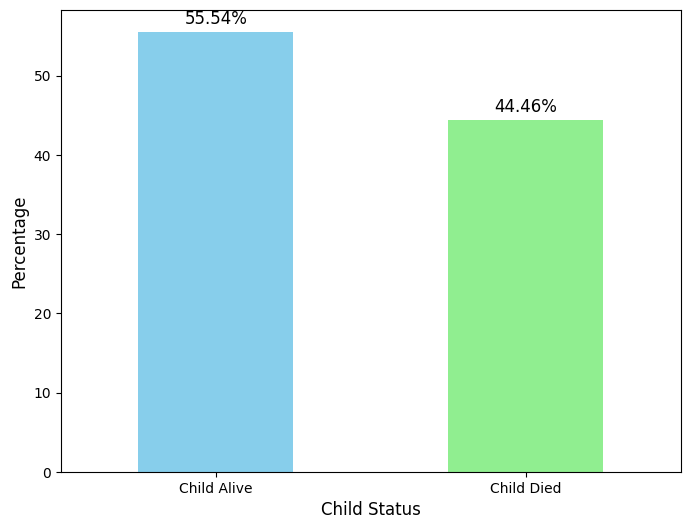

In [ ]:
import matplotlib.pyplot as plt

# The value counts after SMOTE (you've already generated this)
y_counts = y_resampled.value_counts()

# Calculate percentages
y_percentages = (y_counts / y_counts.sum()) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = y_percentages.plot(kind='bar', color=['skyblue', 'lightgreen'])

# Set custom x-axis labels
bar_plot.set_xticklabels(['Child Alive', 'Child Died'], rotation=0)

# Adding labels and title
plt.xlabel('Child Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Show the percentages on top of the bars
for index, value in enumerate(y_percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display the plot
plt.show()


In [ ]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X2_test = scaler.transform(X2_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
# Logistic regression
model_log = LogisticRegression()
model_log.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
# 2nd model to run is Random Forest
from sklearn.ensemble import RandomForestClassifier

rf2_model = RandomForestClassifier()
rf2_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [ ]:
# 3rd model to run Support Vector Regression model
from sklearn.svm import SVC
svm_mod = SVC()
svm_mod.fit(X_resampled, y_resampled)

SVC()

In [ ]:
# 4th model Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)

GaussianNB()

In [ ]:
# 5th model K-Nearest Neighbors (KNN) model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [ ]:
# Creating decision tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [ ]:
# Creating XGboost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Making predictions
y_pred_log = model_log.predict(X2_test)
y_pred_rf = rf2_model.predict(X2_test)
y_pred_svm1 = svm_mod.predict(X2_test)
y_pred_nb = nb_model.predict(X2_test)
y_pred_knn = knn_model.predict(X2_test)
y_pred_dt = dt_model.predict(X2_test)
y_pred_xgb = xgb_model.predict(X2_test)

In [ ]:
# Model Evaluation

# For logistic regression

l_accuracy = accuracy_score(y2_test, y_pred_log)
l_cm = confusion_matrix(y2_test, y_pred_log)
l_report = classification_report(y2_test, y_pred_log)

print(f'LR Accuracy: {l_accuracy}')
print('Confusion Matrix:')
print(l_cm)
print('Classification Report:')
print(l_report)

# For RF

rf_accuracy = accuracy_score(y2_test, y_pred_rf)
rf_cm = confusion_matrix(y2_test, y_pred_rf)
rf_report = classification_report(y2_test, y_pred_rf)

print(f' RF Accuracy: {rf_accuracy}')
print('Confusion Matrix:')
print(rf_cm)
print('Classification Report:')
print(rf_report)

# For SVM

sv_accuracy = accuracy_score(y2_test, y_pred_svm1)
sv_cm = confusion_matrix(y2_test, y_pred_svm1)
sv_report = classification_report(y2_test, y_pred_svm1)

print(f' SVM Accuracy: {sv_accuracy}')
print('Confusion Matrix:')
print(sv_cm)
print('Classification Report:')
print(sv_report)

# For Decision tree

dt_accuracy = accuracy_score(y2_test, y_pred_dt)
dt_cm = confusion_matrix(y2_test, y_pred_dt)
dt_report = classification_report(y2_test, y_pred_dt)

print(f' DT Accuracy: {dt_accuracy}')
print('Confusion Matrix:')
print(dt_cm)
print('Classification Report:')
print(dt_report)

# For Naive Bayes
nb_accuracy = accuracy_score(y2_test, y_pred_nb)
nb_cm = confusion_matrix(y2_test, y_pred_nb)
nb_report = classification_report(y2_test, y_pred_nb)

print(f'NB Accuracy: {nb_accuracy}')
print('Confusion Matrix:')
print(nb_cm)
print('Classification Report:')
print(nb_report)

# For KNN
knn_accuracy = accuracy_score(y2_test, y_pred_knn)
knn_cm = confusion_matrix(y2_test, y_pred_knn)
knn_report = classification_report(y2_test, y_pred_knn)

print(f'KNN Accuracy: {knn_accuracy}')
print('Confusion Matrix:')
print(knn_cm)
print('Classification Report:')
print(knn_report)

# For XGboost
xgb_accuracy = accuracy_score(y2_test, y_pred_xgb)
xgb_cm = confusion_matrix(y2_test, y_pred_xgb)
xgb_report = classification_report(y2_test, y_pred_xgb)

print(f'XGB Accuracy: {xgb_accuracy}')
print('Confusion Matrix:')
print(xgb_cm)
print('Classification Report:')
print(xgb_report)

LR Accuracy: 0.8948356807511737
Confusion Matrix:
[[ 30  13]
 [ 99 923]]
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.70      0.35        43
           1       0.99      0.90      0.94      1022

    accuracy                           0.89      1065
   macro avg       0.61      0.80      0.65      1065
weighted avg       0.96      0.89      0.92      1065

 RF Accuracy: 0.9389671361502347
Confusion Matrix:
[[ 20  23]
 [ 42 980]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.47      0.38        43
           1       0.98      0.96      0.97      1022

    accuracy                           0.94      1065
   macro avg       0.65      0.71      0.67      1065
weighted avg       0.95      0.94      0.94      1065

 SVM Accuracy: 0.9192488262910798
Confusion Matrix:
[[ 29  14]
 [ 72 950]]
Classification Report:
              precision    recall  f1-score   support



In [ ]:
# Computing Confusion matrix for Logistic regression

l_cm = confusion_matrix(y2_test, y_pred_log)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = l_cm.ravel()

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print results
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity (Recall): 0.90
Specificity: 0.70


In [ ]:
# Predict probabilities
y_proba_lo = model_log.predict_proba(X2_test)[:, 1]  # Get the probability of the positive class
y_prob_rf = rf2_model.predict_proba(X2_test)[:, 1]
y_prob_dt = dt_model.predict_proba(X2_test)[:, 1]
y_prob_nb = nb_model.predict_proba(X2_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X2_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X2_test)[:, 1]

svm_mod = SVC(probability=True)  # Initialize with probability=True
svm_mod.fit(X_resampled, y_resampled)
y_prob_svm = svm_mod.predict_proba(X2_test)[:, 1]

# ROC curve and AUC for the SVM model
fpr_sv, tpr_sv, _ = roc_curve(y2_test, y_pred_svm1)
roc_auc_sv = roc_auc_score(y2_test, y_pred_svm1)

# Compute ROC curve
fpr_lo, tpr_lo, thresholds = roc_curve(y2_test, y_proba_lo)
fpr_rf, tpr_rf, thresholds = roc_curve(y2_test, y_prob_rf)
#fpr_sv, tpr_sv, thresholds = roc_curve(y2_test, y_prob_svm)
fpr_dt, tpr_dt, thresholds = roc_curve(y2_test, y_prob_dt)
fpr_nb, tpr_nb, thresholds = roc_curve(y2_test, y_prob_nb)
fpr_xgb, tpr_xgb, thresholds = roc_curve(y2_test, y_prob_xgb)
fpr_knn, tpr_knn, thresholds = roc_curve(y2_test, y_prob_knn)

In [ ]:
roc_auc_lo = roc_auc_score(y2_test, y_proba_lo)
print(f' Logistic regression ROC AUC: {roc_auc_lo}')

roc_auc_rf = roc_auc_score(y2_test, y_prob_rf)
print(f' Random Forest ROC AUC: {roc_auc_rf}')

roc_auc_sv = roc_auc_score(y2_test, y_pred_svm1)
print(f' SVM ROC AUC: {roc_auc_sv}')

roc_auc_dt = roc_auc_score(y2_test, y_prob_dt)
print(f' Decision Tree ROC AUC: {roc_auc_dt}')

roc_auc_nb = roc_auc_score(y2_test, y_prob_nb)
print(f' Naive Bayes ROC AUC: {roc_auc_nb}')

roc_auc_xgb = roc_auc_score(y2_test, y_prob_xgb)
print(f' XGB ROC AUC: {roc_auc_xgb}')

 Logistic regression ROC AUC: 0.8544349883948481
 Random Forest ROC AUC: 0.8643676330041415
 SVM ROC AUC: 0.8019842534019023
 Decision Tree ROC AUC: 0.679948118144996
 Naive Bayes ROC AUC: 0.8063987621171438
 XGB ROC AUC: 0.8586105675146771


In [ ]:
roc_auc_knn = roc_auc_score(y2_test, y_prob_knn)
print(f' KNN ROC AUC: {roc_auc_knn}')

 KNN ROC AUC: 0.7595571838165021


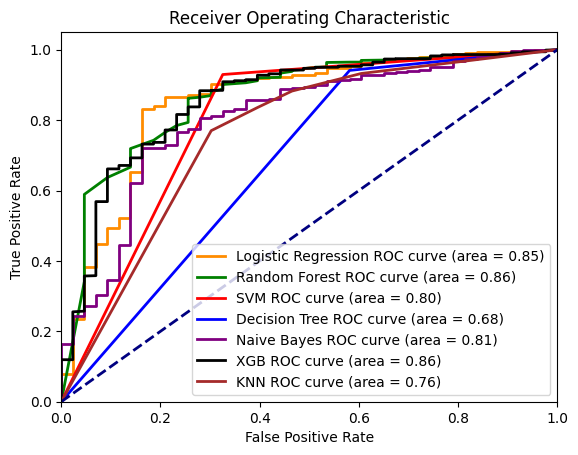

In [ ]:
plt.figure()
plt.plot(fpr_lo, tpr_lo, color='darkorange', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lo)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_sv, tpr_sv, color='red', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_sv)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_xgb, tpr_xgb, color='black', lw=2, label='XGB ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_knn, tpr_knn, color='brown', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

From the above chart, 3 models, namely, XGboost, Logistic regression and Random Forest are the best models for predicting child mortality and they have the acccuracy level above 0.97

In [ ]:
# Assessing the importance of each variable

importances = rf2_model.feature_importances_ # Use feature_importances_ for Random Forest
feature_names = X2.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                              Feature  Importance
11                    child_breastfed    0.263313
3   Children_5_and_under_in_household    0.212241
10           preceding_birth_interval    0.138016
2         Number_of_household_members    0.061747
12        Toilet_facility_dichotomous    0.059047
4                     Use_of_internet    0.054450
7              Current_marital_status    0.035820
5            Total_childreb_ever_born    0.034569
6           Births_in_last_five_years    0.033457
13            drinking_water_improved    0.030483
8                         birth_order    0.028859
0           Household_has_electricity    0.021629
9                       Child_is_twin    0.018515
1                           Ethnicity    0.007855


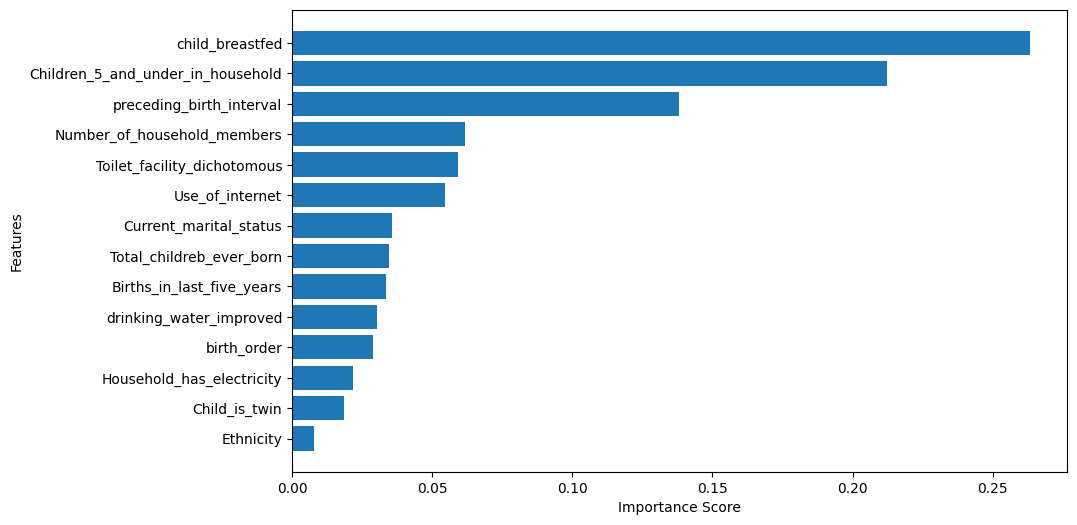

In [ ]:
# Assuming you've already computed `importances` and `indices`
indices = np.argsort(importances)

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
#plt.title("Feature Importance - Random Forest")
plt.barh(range(X2.shape[1]), importances[indices], align="center")
plt.yticks(range(X2.shape[1]), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# Assessing the importance of each variable

# Use coef_ for Logistic Regression
importances = abs(model_log.coef_[0])
feature_names = X2.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                              Feature  Importance
3   Children_5_and_under_in_household    2.537154
8                         birth_order    2.133595
5            Total_childreb_ever_born    1.956798
11                    child_breastfed    1.537172
1                           Ethnicity    1.191379
2         Number_of_household_members    0.557168
4                     Use_of_internet    0.502238
10           preceding_birth_interval    0.492344
7              Current_marital_status    0.471533
12        Toilet_facility_dichotomous    0.444023
13            drinking_water_improved    0.298684
9                       Child_is_twin    0.240509
6           Births_in_last_five_years    0.164495
0           Household_has_electricity    0.016870


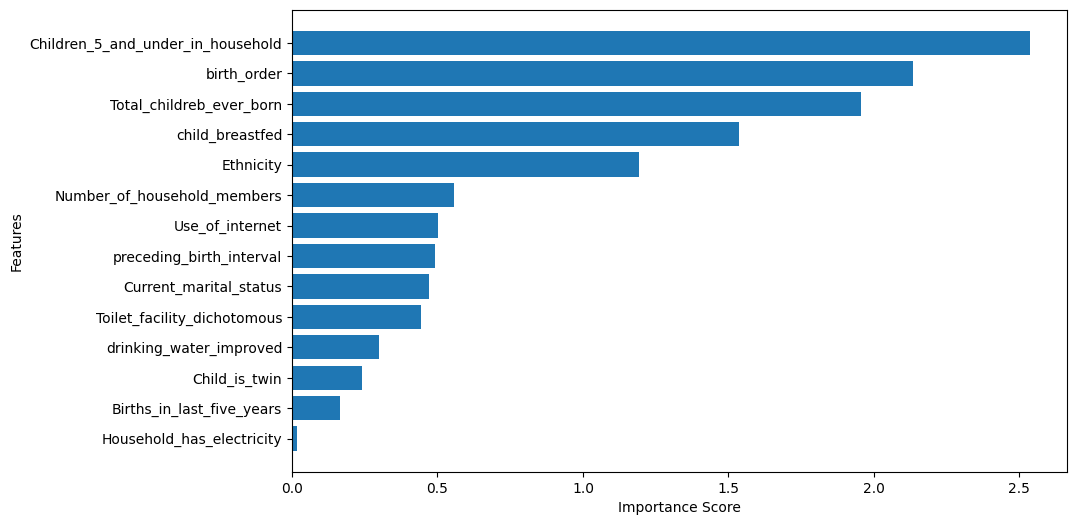

In [ ]:
# Assuming you've already computed `importances` and `indices`
indices = np.argsort(importances)

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
#plt.title("Feature Importance - Random Forest")
plt.barh(range(X2.shape[1]), importances[indices], align="center")
plt.yticks(range(X2.shape[1]), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Using XGBoost to determine the important variables

In [ ]:
# Assessing the importance of each variable

importances = xgb_model.feature_importances_ # Use feature_importances_ for XGBOOST
feature_names = X2.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                              Feature  Importance
11                    child_breastfed    0.634108
3   Children_5_and_under_in_household    0.095358
0           Household_has_electricity    0.035792
4                     Use_of_internet    0.033882
6           Births_in_last_five_years    0.032616
13            drinking_water_improved    0.026491
1                           Ethnicity    0.025356
12        Toilet_facility_dichotomous    0.024988
9                       Child_is_twin    0.021823
10           preceding_birth_interval    0.018117
2         Number_of_household_members    0.016620
7              Current_marital_status    0.014324
5            Total_childreb_ever_born    0.011369
8                         birth_order    0.009157


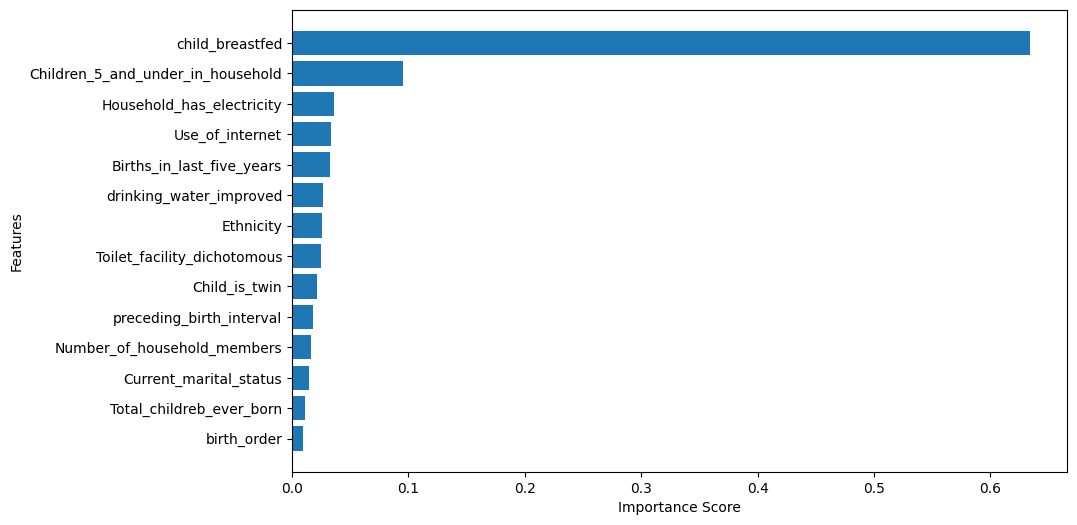

In [ ]:
# Assuming you've already computed `importances` and `indices`
indices = np.argsort(importances)

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
#plt.title("Feature Importance - XGBoost")
plt.barh(range(X2.shape[1]), importances[indices], align="center")
plt.yticks(range(X2.shape[1]), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# Importing necessary libraries for overfitting prevention techniques
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb


cv_folds = 5

# Logistic Regression with regularization to prevent overfitting
log_model = LogisticRegression(penalty='l2', random_state=42)
log_cv_scores = cross_val_score(log_model, X_resampled, y_resampled, cv=cv_folds, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {log_cv_scores.mean()}")

# Random Forest with hyperparameter tuning to reduce overfitting
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=cv_folds, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_resampled, y_resampled)
print(f"Best Parameters for Random Forest: {rf_grid_search.best_params_}")

# SVM with parameter tuning and using regularization
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_cv_scores = cross_val_score(svm_model, X_resampled, y_resampled, cv=cv_folds, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean()}")

# XGBoost with early stopping to prevent overfitting
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_params, cv=cv_folds, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_resampled, y_resampled)
print(f"Best Parameters for XGBoost: {xgb_grid_search.best_params_}")

# Adding notes on overfitting prevention techniques
print("\n### Overfitting Prevention Techniques ###")
print("1. Cross-Validation: We used k-fold cross-validation to ensure model generalization.")
print("2. Regularization: Applied L2 regularization in Logistic Regression to constrain the model coefficients.")
print("3. Hyperparameter Tuning: Used GridSearchCV to find the best parameters for Random Forest, SVM, and XGBoost.")
print("4. Early Stopping: Implemented in XGBoost to stop training when the performance on the validation set stops improving.")


Logistic Regression Cross-Validation Accuracy: 0.9070002007573397
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
SVM Cross-Validation Accuracy: 0.9434577336573142
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

### Overfitting Prevention Techniques ###
1. Cross-Validation: We used k-fold cross-validation to ensure model generalization.
2. Regularization: Applied L2 regularization in Logistic Regression to constrain the model coefficients.
3. Hyperparameter Tuning: Used GridSearchCV to find the best parameters for Random Forest, SVM, and XGBoost.
4. Early Stopping: Implemented in XGBoost to stop training when the performance on the validation set stops improving.


In [ ]:
# Importing necessary libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for Decision Tree to address overfitting
dt_params = {
    'max_depth': [5, 10, 20, None],  # Limiting the depth to control model complexity
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Use GridSearchCV for hyperparameter tuning
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
dt_grid_search.fit(X_resampled, y_resampled)

# Best parameters for Decision Tree
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)

# Predict and evaluate
y_pred_dt = dt_grid_search.best_estimator_.predict(X2_test)
print(f"Decision Tree Accuracy: {accuracy_score(y2_test, y_pred_dt)}")

# Cross-validation score for Decision Tree
dt_cv_scores = cross_val_score(dt_grid_search.best_estimator_, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean()}")

# Adding the Decision Tree to the model performance summary
model_performance = {
    'Model': ['Decision Tree'],
    'Best Hyperparameters': [dt_grid_search.best_params_],
    'Best CV Accuracy': [dt_cv_scores.mean()]
}

import pandas as pd
performance_df = pd.DataFrame(model_performance)
print(performance_df)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9014084507042254
Decision Tree CV Accuracy: 0.9505326992170463
           Model                               Best Hyperparameters  \
0  Decision Tree  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

   Best CV Accuracy  
0          0.950533  


In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

# Decision Tree Model with Hyperparameter Tuning
dt_model = DecisionTreeClassifier(random_state=42)

dt_params = {
    'max_depth': [5, 10, 20, None],  # Limiting the depth to control model complexity
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

dt_grid_search = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
dt_grid_search.fit(X_resampled, y_resampled)

# Best parameters and evaluation for Decision Tree
best_dt = dt_grid_search.best_estimator_
dt_best_params = dt_grid_search.best_params_
y_pred_dt = best_dt.predict(X2_test)
dt_accuracy = accuracy_score(y2_test, y_pred_dt)
dt_cv_score = cross_val_score(best_dt, X_resampled, y_resampled, cv=5, scoring='accuracy').mean()

print(f"Best parameters for Decision Tree: {dt_best_params}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree CV Accuracy: {dt_cv_score}")

# K-Nearest Neighbors (KNN) Model with Hyperparameter Tuning
knn_model = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

knn_grid_search = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
knn_grid_search.fit(X_resampled, y_resampled)

# Best parameters and evaluation for KNN
best_knn = knn_grid_search.best_estimator_
knn_best_params = knn_grid_search.best_params_
y_pred_knn = best_knn.predict(X2_test)
knn_accuracy = accuracy_score(y2_test, y_pred_knn)
knn_cv_score = cross_val_score(best_knn, X_resampled, y_resampled, cv=5, scoring='accuracy').mean()

print(f"Best parameters for KNN: {knn_best_params}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"KNN CV Accuracy: {knn_cv_score}")

# Naïve Bayes Model (GaussianNB) with Hyperparameter Tuning
nb_model = GaussianNB()

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter
}

nb_grid_search = GridSearchCV(nb_model, nb_params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
nb_grid_search.fit(X_resampled, y_resampled)

# Best parameters and evaluation for Naïve Bayes
best_nb = nb_grid_search.best_estimator_
nb_best_params = nb_grid_search.best_params_
y_pred_nb = best_nb.predict(X2_test)
nb_accuracy = accuracy_score(y2_test, y_pred_nb)
nb_cv_score = cross_val_score(best_nb, X_resampled, y_resampled, cv=5, scoring='accuracy').mean()

print(f"Best parameters for Naïve Bayes: {nb_best_params}")
print(f"Naïve Bayes Accuracy: {nb_accuracy}")
print(f"Naïve Bayes CV Accuracy: {nb_cv_score}")

# Summarizing Model Performance
model_performance = {
    'Model': ['Decision Tree', 'KNN', 'Naïve Bayes'],
    'Best Hyperparameters': [dt_best_params, knn_best_params, nb_best_params],
    'Best CV Accuracy': [dt_cv_score, knn_cv_score, nb_cv_score],
    'Test Accuracy': [dt_accuracy, knn_accuracy, nb_accuracy]
}

performance_df = pd.DataFrame(model_performance)
print(performance_df)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9014084507042254
Decision Tree CV Accuracy: 0.9505326992170463
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
KNN Accuracy: 0.888262910798122
KNN CV Accuracy: 0.9464268654856596
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Naïve Bayes: {'var_smoothing': 1e-05}
Naïve Bayes Accuracy: 0.7633802816901408
Naïve Bayes CV Accuracy: 0.8207036198625157
           Model                               Best Hyperparameters  \
0  Decision Tree  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
1            KNN  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...   
2    Naïve Bayes                           {'var_smoothing': 1e-05}   

   Best CV Accuracy 

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
# calculating specificity
def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Storing model metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Sensitivity (Recall)": [],
    "Specificity": [],
    "Precision": [],
    "F1-score": [],
    "AUC": []
}

# Showing models and their predictions
models = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm1,
    "Decision Tree": y_pred_dt,
    "Naive Bayes": y_pred_nb,
    "KNN": y_pred_knn,
    "XGBoost": y_pred_xgb
}

# Metrics for the model
for model_name, y_pred in models.items():
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(y2_test, y_pred))
    metrics["Sensitivity (Recall)"].append(recall_score(y2_test, y_pred))
    metrics["Specificity"].append(specificity(y2_test, y_pred))
    metrics["Precision"].append(precision_score(y2_test, y_pred))
    metrics["F1-score"].append(f1_score(y2_test, y_pred))
    metrics["AUC"].append(roc_auc_score(y2_test, y_pred))

# DataFrame to display metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

from tabulate import tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

                 Model  Accuracy  Sensitivity (Recall)  Specificity  \
0  Logistic Regression  0.894836              0.903131     0.697674   
1        Random Forest  0.938967              0.958904     0.465116   
2                  SVM  0.919249              0.929550     0.674419   
3        Decision Tree  0.901408              0.918787     0.488372   
4          Naive Bayes  0.763380              0.763209     0.767442   
5                  KNN  0.888263              0.903131     0.534884   
6              XGBoost  0.933333              0.956947     0.372093   

   Precision  F1-score       AUC  
0   0.986111  0.942799  0.800403  
1   0.977069  0.967901  0.712010  
2   0.985477  0.956697  0.801984  
3   0.977107  0.947050  0.703579  
4   0.987342  0.860927  0.765326  
5   0.978791  0.939440  0.719007  
6   0.973134  0.964973  0.664520  
+----+---------------------+------------+------------------------+---------------+-------------+------------+----------+
|    | Model               |  

In [ ]:
svm_model = SVC(probability=True, random_state=42)

In [ ]:
# SVM with parameter tuning and using regularization
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42, probability=True) # Added probability=True
svm_cv_scores = cross_val_score(svm_model, X_resampled, y_resampled, cv=cv_folds, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean()}")

SVM Cross-Validation Accuracy: 0.9434577336573142


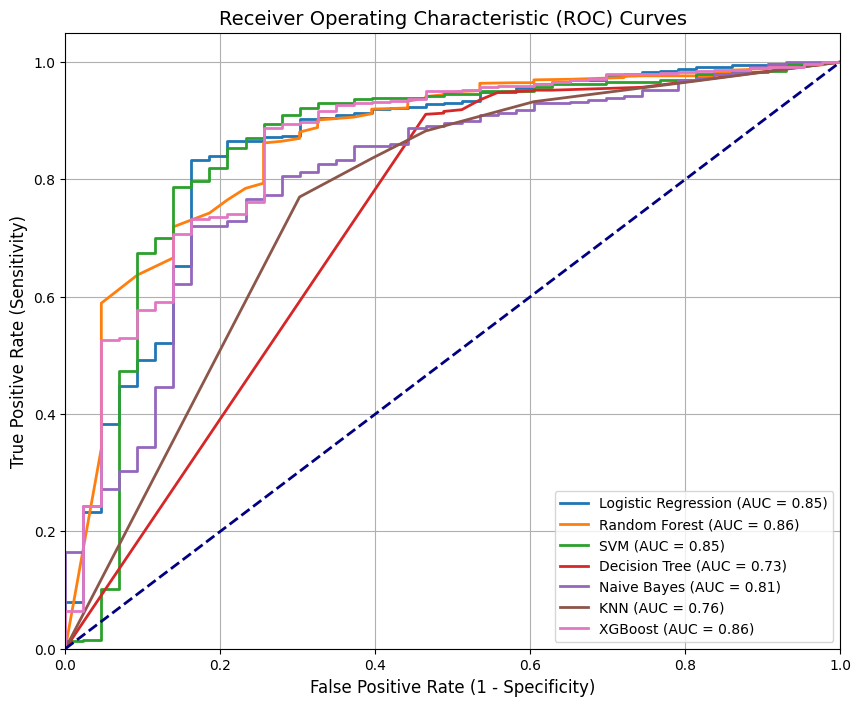

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predicted probabilities for each model
y_pred_proba_log = model_log.predict_proba(X2_test)[:, 1]
y_pred_proba_rf = rf2_model.predict_proba(X2_test)[:, 1]
y_pred_proba_dt = dt_grid_search.best_estimator_.predict_proba(X2_test)[:, 1]
# Use best_nb (from GridSearchCV) to predict probabilities
y_pred_proba_nb = nb_grid_search.best_estimator_.predict_proba(X2_test)[:, 1]
knn_model.fit(X_resampled, y_resampled)
y_pred_proba_knn = knn_model.predict_proba(X2_test)[:, 1]

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)
y_prob_xgb = xgb_model.predict_proba(X2_test)[:, 1]

# Ensure that the SVM model has been initialized with probability=True
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42, probability=True)
svm_model.fit(X_resampled, y_resampled)  # Fit the SVM model before making predictions
y_pred_proba_svm = svm_model.predict_proba(X2_test)[:, 1]
y_pred_proba_svm = svm_model.predict_proba(X2_test)[:, 1]

y_pred_proba_xgb = xgb_grid_search.best_estimator_.predict_proba(X2_test)[:, 1]

# List of models and their predictions
models = {
    "Logistic Regression": y_pred_proba_log,
    "Random Forest": y_pred_proba_rf,
    "SVM": y_pred_proba_svm,
    "Decision Tree": y_pred_proba_dt,
    "Naive Bayes": y_pred_proba_nb,
    "KNN": y_pred_proba_knn,
    "XGBoost": y_pred_proba_xgb
}

# Plotting the ROC Curves
plt.figure(figsize=(10, 8))

for model_name, y_pred_proba in models.items():
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y2_test, y_pred_proba)
    # Calculate the AUC
    roc_auc = roc_auc_score(y2_test, y_pred_proba)
    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (no skill classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()


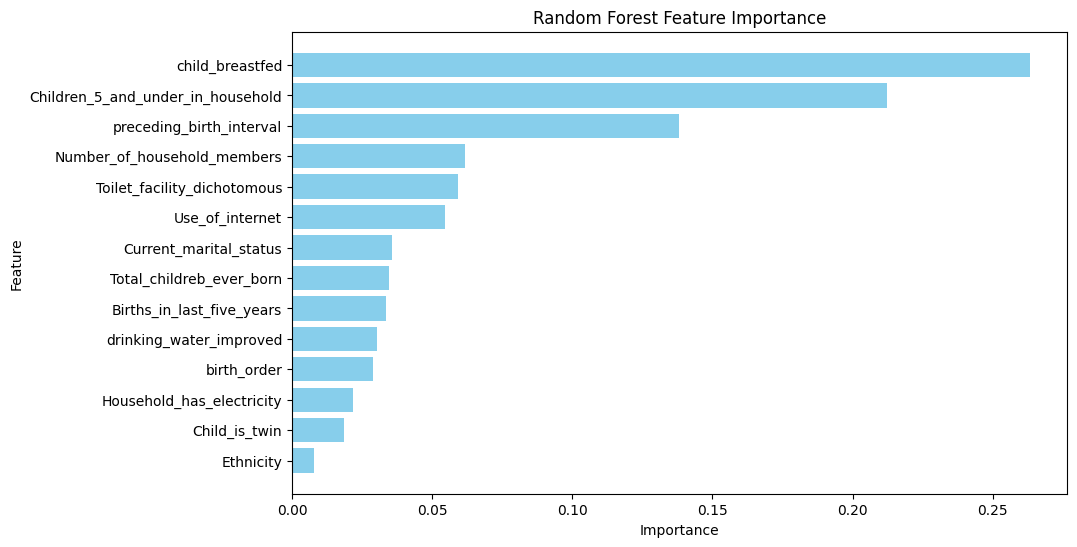

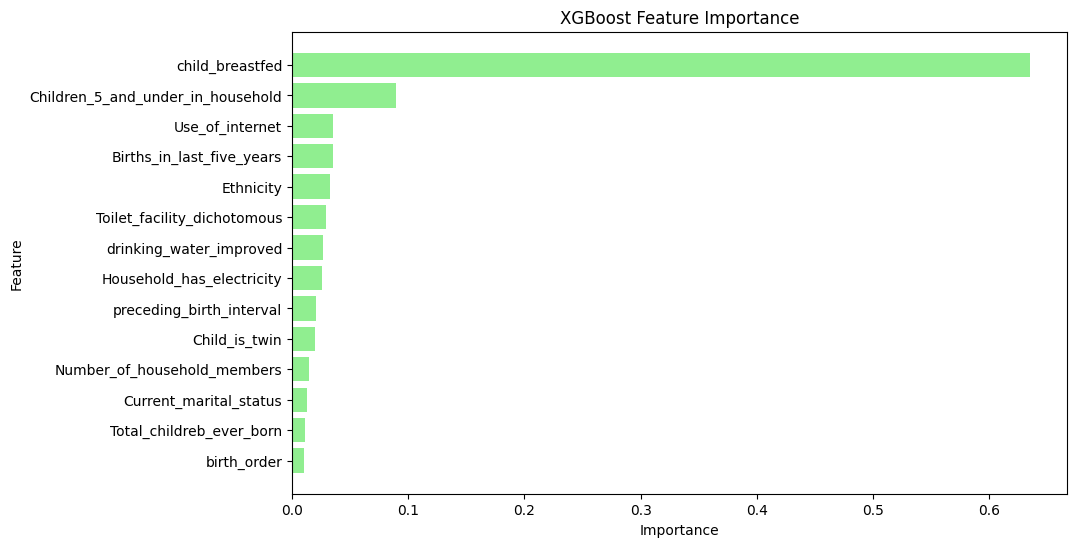

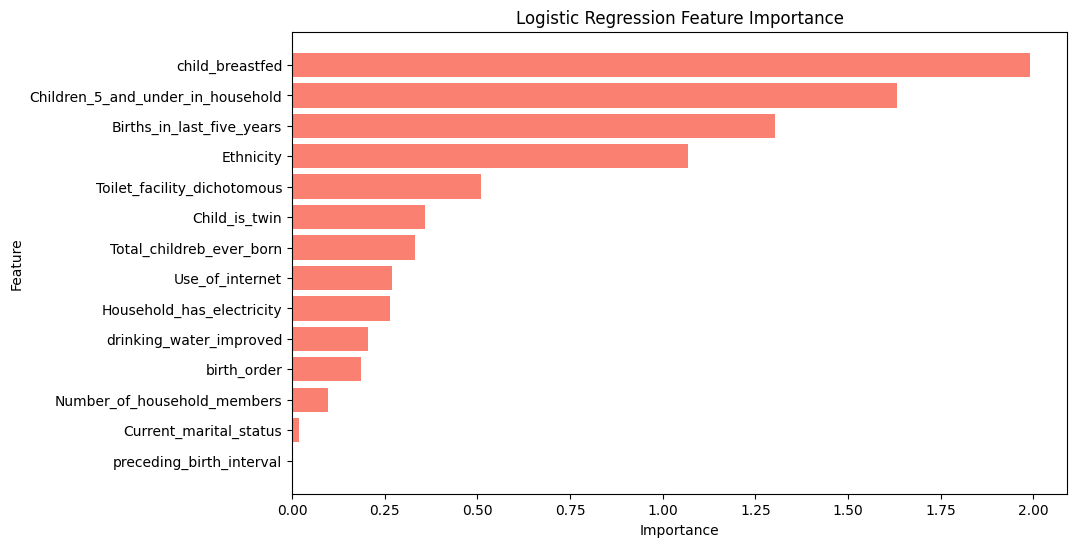

In [ ]:
# For Random Forest
rf_feature_importance = rf2_model.feature_importances_
rf_features = X2_train.columns
rf_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_feature_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot Random Forest feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# For XGBoost
xgb_feature_importance = xgb_grid_search.best_estimator_.feature_importances_
xgb_features = X2_train.columns
xgb_importance_df = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_feature_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Plot XGBoost feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# For Logistic Regression

log_model.fit(X2_train, y2_train)

log_feature_importance = np.abs(log_model.coef_[0])
log_features = X2_train.columns
log_importance_df = pd.DataFrame({'Feature': log_features, 'Importance': log_feature_importance})
log_importance_df = log_importance_df.sort_values(by='Importance', ascending=False)

log_feature_importance = np.abs(log_model.coef_[0])
log_features = X2_train.columns
log_importance_df = pd.DataFrame({'Feature': log_features, 'Importance': log_feature_importance})
log_importance_df = log_importance_df.sort_values(by='Importance', ascending=False)

# Plot Logistic Regression feature importance
plt.figure(figsize=(10, 6))
plt.barh(log_importance_df['Feature'], log_importance_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()


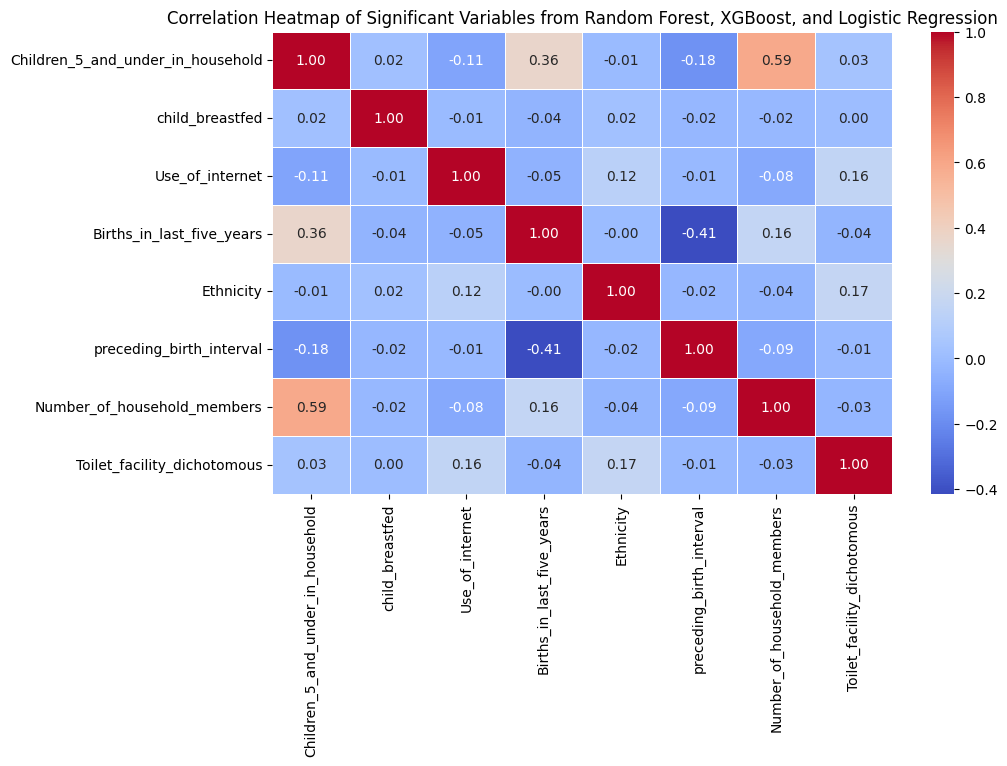

In [ ]:
# Selecting top 5 features from each model
rf_top_features = rf_importance_df.head(5)['Feature'].tolist()
xgb_top_features = xgb_importance_df.head(5)['Feature'].tolist()
log_top_features = log_importance_df.head(5)['Feature'].tolist()

# Combining all unique selected features
selected_features = list(set(rf_top_features + xgb_top_features + log_top_features))

# Extracting relevant data for correlation analysis
df_selected = X2_train[selected_features]  # Assuming X2_train contains feature data

# Compute correlation matrix for the selected significant variables
corr_matrix_selected = df_selected.corr(method="spearman")

# Creating a heatmap for the correlation of significant variables
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_selected, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Significant Variables from Random Forest, XGBoost, and Logistic Regression")
plt.show()
